## 여러 분류 모델 성능 평가 지표를 활용한 모델 평가

### 피마 인디언 당뇨병 예측
- 피마 인디언 당뇨병 (Pima Indian Diabetes) 데이터 세트를 이용해  
- 당뇨병 여부를 판단하는 머신러닝 예측 모델을 수립하고  
- 오차행렬, 정확도, 정밀도, 재현율, F1 스코어, ROC AUC 평가 지표 적용  

### 피마 인디언 당뇨병 예측 모델  
- 사용 데이터 세트 : Pima Indian Diabetes  
- 데이터 세트 분리 : 테스트용(평가용) 데이터 세트 20%  
- 사용하는 ML 알고리즘 : 로지스틱 회귀 알고리즘  
- 모델 평가 : 예측 성능 평가   
    - 오차행렬, 정확도, 정밀도, 재현율, F1 스코어, ROC AUC 평가 지표 

#### 피마 인디언 당뇨명 데이터 세트  
- 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터  
- 보통 당뇨 원인으로 식습관과 유전을 꼽음  
- 피마 지역은 고립된 지역에서 인디언 고유의 활동이 지속돼 왔지만  
- 20세기 후반에 들어서면서 서구화된 식습관으로 많은 당뇨 환자 발생  
- 고립된 유전적 특성 때문에 당뇨학회에서는 피마 인디언의 당뇨병 자료에 대해 많은 연구 수행  

https://www.kaggle.com/  
회원가입하고 데이터 다운로드  


###  피마 인디언 당뇨병 예측 프로세스
(1) 데이터 세트 준비 : 피마 인디언 당뇨명 데이터 세트  
(2) 데이터 세트 분리 : 학습 데이터 / 테스트 데이터 세트  
(3) 모델 생성/학습/예측 수행 :  로지스틱 회귀 알고리즘 적용하여 모델 생성    
(4) 평가 : 예측 성능 평가 지표 출력   
(5) 재현율 성능에 조금 더 초점을 맞춰 조정  
(6) 예측 성능을 향상시키기 위해 데이터 가공 수행  
(7) 다시 예측 성능 평가  

In [71]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### (1) 데이터 세트 준비 : 피마 인디언 당뇨명 데이터 세트

In [73]:
diabetes_data = pd.read_csv('./data/diabetes.csv')
diabetes_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


피마 인디언 당뇨병 데이터 세트 피처
* Pregnancies: 임신 횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압(mm Hg)
* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* Insulin: 혈청 인슐린(mu U/ml)
* BMI: 체질량지수(체중(kg)/(키(m))^2)
* DiabetesPedigreeFunction: 당뇨 내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정 값(0또는 1)

In [ ]:
# 레이블 데이터 확인 : 'Outcome' 
# (클래스 결정값 (정답) : 0, 1)


# 전체 768 관측치 중에서
# 0 Negative 값이 500
# 1 Positive(당뇨) 값이 268

# Negative 값이 상대적으로 더 많음 

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:


# Null 값 없음
# 별도의 전처리 하지 않고 일단 진행 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# 레이블 데이터 

labels.head()

# 피처 데이터 

feature_data.head(2)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


### (2) 데이터 세트 분리 : 학습 데이터 / 테스트 데이터 세트

In [78]:
# stratify=레이블데이터 옵션 있는 경우 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_data,
                                                    labels,
                                                    test_size=0.2,                                                
                                                    random_state=11,
                                                    stratify=labels)


In [ ]:
# stratify=레이블데이터 옵션 있는 경우 
# 데이터 세트 분리하기 전과 후의 레이블값 분포(비율) 확인 
# 분리전
labels.value_counts(normalize=True)

# 분리후


Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64

Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64

#### stratify=y 옵션
- y : 레이블 데이터 
- 레이블 값에서 0과 1의 비율을 유지하면서 데이터 세트 분리


### (3) 모델 학습 및 예측 수행 
- 로지스틱 회귀(분류) 알고리즘 적용하여 모델 학습 및 예측 

In [80]:
from sklearn.linear_model import LogisticRegression

# 모델 생성
lr_clf = LogisticRegression(max_iter=3000)

# 모델 학습 및 예측
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)


LogisticRegression(max_iter=3000)

In [12]:
y_pred
y_pred.size

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

154

### (4) 평가 : 예측 성능 평가 지표 출력 
- 오차행렬, 정확도, 정밀도, 재현율, F1 스코어, ROC AUC 평가 지표

In [ ]:
# 예측 모델 평가 수행 및 평가 지표를 출력하는 함수 작성
# y_test, y_pred, pred_proba 파라미터로 받음 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score 
# from sklearn.metrics import accuracy_score, roc_auc_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score 

# 실제값, 예측값, 예측 확률
def get_clf_eval(y_test, y_pred, pred_proba):

    
    # 오차행렬
    print('오차행렬 :', cm)
    print(f'정확도 : {accuray:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}, F1 Score : {f1:.4f}, ROC_AUC : {roc_auc:.4f}')
    
    

In [ ]:
# 함수 호출해서 예측 모델 평가 및 평가 지표 출력 

# 레이블 값이 1(Positive)일 때의 예측 확률 사용 
# 1(Positive)일 때의 확률


# 결과
# 오차행렬 : [[90 10]
#  [24 30]]
# 정확도 : 0.7792, 정밀도 : 0.7500, 재현율 : 0.5556, F1 Score : 0.6383, ROC_AUC : 0.8513

# 예측 정확도가 78%, 재현율이 약56%
# 재현율이 낮게 나왔음
# 데이터가 당뇨병 환자 예측으로 재현율에 더 초점을 맞춰 조정해야 함
# 실제 Positive 당뇨병 양성 데이터를 Negative 정상으로 잘못 판단할 경우 심각한 문제가 발생할 수 있음 

# 재현율이 중요 지표로 사용되는 경우 : 암 판단 (당뇨병 판단)

오차행렬 : [[90 10]
 [24 30]]
정확도 : 0.7792, 정밀도 : 0.7500, 재현율 : 0.5556, F1 Score : 0.6383, ROC_AUC : 0.8513


### (5) 재현율 성능에 조금 더 초점을 맞춰 조정

In [ ]:
# 먼저 정밀도와 재현율 곡선을 확인하고
# 임계값 별로 정밀도와 재현율 값의 변화 확인 

In [ ]:
# precision_recall_curve() 사용해서 
from sklearn.metrics import precision_recall_curve

thresholds.size
precision.size
reacalls.size

154

155

155

In [84]:
# 그래프
# x축은 thresholds 값, y축은 정밀도, 재현율  값으로 plot() 
# x축을 사용할 thresholds 값은 154개
# 정밀도, 재현율 값은 155개
threshold_boundary = thresholds.shape[0]
threshold_boundary

154

In [85]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
# 임계값의 변환에 따른 정밀도-재현율 변환 곡선 시각화하는 함수 작성

def precision_recall_curve_plot(y_test, pred_proba): 
    precision, reacalls, thresholds = precision_recall_curve(y_test, pred_proba)

    # x축은 thresholds 값, y축은 정밀도, 재현율  값으로 plot() 
    threshold_boundary = thresholds.shape[0] # (154, 0)에서 154 추출 

    # thresholds는 154이고, precision과 recalls는 155로 x축과 y축 값의 개수가 맞지 않으므로
    # 그래프 그리면 오류 발생
    # y값을 [0:threshold_boundary]로 154개 추출해서 x축 개수와 맞춤 
    plt.plot(thresholds, precision[0:threshold_boundary], 
             linestyle='--', label='precision')

    plt.plot(thresholds, reacalls[0:threshold_boundary], label='reacall')

    # thresholds 값 x축 : 0, 1 단위로 변경
    # xlim() : x축  범위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Thresholds Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()
    


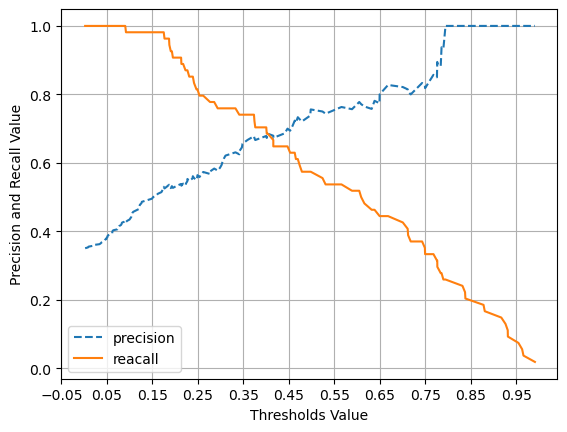

In [87]:
# 레이블 값이 1일 때의 예측 확률

pred_proba = lr_clf.predict_proba(X_test)[:, 1]

precision_recall_curve_plot(y_test, pred_proba)

# 그래프 확인 결과
# 정밀도와 재현율이 균형을 이루는 지점 (두 선이 만나는 지점)의 임계값이 약 0.4xx
# 그런데 이 지점에서 정밀도와 재현율 두 지표 모두 0.7이 안되는 수치로 낮은 편이라서
# 임계값 조정이 필요

# 임계값을 조정하기 전에 다시 데이터 점검 
# 앞에서 Null 값이 없어서 별다른 전처리 수행하지 않았음

# 일반적으로 미리 모든 전처리를 수행하고 모델링을 시작할 수도 있지만
# 일단 필요한 전처리하고 모델링 수행한 후 결과를 보고 
# 다시 전처리를 수행하기도 함 

### (6) 예측 성능을 향상시키기 위해 데이터 가공 수행
- 0 값 확인하고 다른 값으로 대체
- 피처 스케일링 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 각 피처들의 값 분포 확인

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

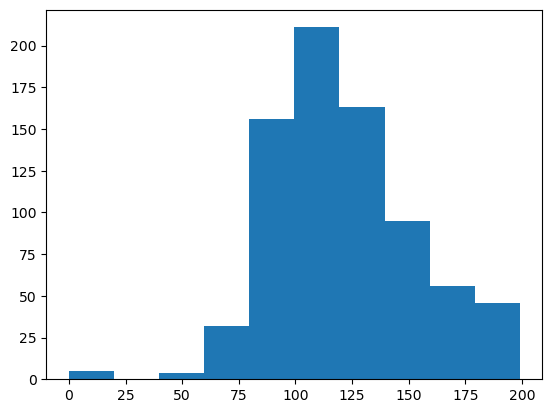

In [ ]:
# Glucose(포도당) 피처의 히스토그램 확인




### 0값이 있는 피처들에서 0값의 데이터 건수와 퍼센트 계산
- 0값의 데이터 건수  
- 전체 데이터 건수 대비 몇 퍼센트의 비율인지 확인  

In [ ]:
# 0값을 검사할 피처명 리스트 생성
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터건수
total_count = diabetes_data['Glucose'].count()
total_count

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    
    print(f'{feature} 0건수는 {zero_count}, 퍼센트 {100*zero_count/total_count:.2f} %')



768

Glucose 0건수는 5, 퍼센트 0.65 %
BloodPressure 0건수는 35, 퍼센트 4.56 %
SkinThickness 0건수는 227, 퍼센트 29.56 %
Insulin 0건수는 374, 퍼센트 48.70 %
BMI 0건수는 11, 퍼센트 1.43 %


**0값을 평균값으로 대체**

In [ ]:
# 0값을 평균 값으로 대체
# 0 값이 포함된 평균




In [92]:
# 피처별로 반복하면서 데이터 값이 0인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print(f'{feature} 0건수는 {zero_count}, 퍼센트 {100*zero_count/total_count:.2f} %')


Glucose 0건수는 0, 퍼센트 0.00 %
BloodPressure 0건수는 0, 퍼센트 0.00 %
SkinThickness 0건수는 0, 퍼센트 0.00 %
Insulin 0건수는 0, 퍼센트 0.00 %
BMI 0건수는 0, 퍼센트 0.00 %


### 피처 스케일링 (feature scaling)
- 서로 다른 변수의 값 범위를 일정한 수준으로 맞춤
- StandardScaler 클래스의 fit_transform() 메소드 이용해서 
- 피처 데이터 세트에 일괄적으로 스케일링 적용하고  
- 0값을 평균으로 대체한 데이터 세트로 학습/예측 수행  
- 개별 피처를 평균이 0이고 분산이 1인 값으로 변환

### 피처 스케일링 후 다시 예측 프로세스 진행

In [ ]:
from sklearn.preprocessing import StandardScaler

# 피처 데이터 
feature_data = diabetes_data.drop('Outcome', axis=1)

# 레이블 데이터 
labels = diabetes_data['Outcome']


# 표준 스케일링 적용



# 학습/테스트 데이터 세트  분리
# 스케일링된 피처 데이터 세트 사용
X_train, X_test, y_train, y_test = train_test_split(feature_data_scaled,
                                                    labels,
                                                    test_size=0.2,                                                
                                                    random_state=11,
                                                    stratify=labels)


LogisticRegression(max_iter=3000)

오차행렬 : [[88 12]
 [25 29]]
정확도 : 0.7597, 정밀도 : 0.7073, 재현율 : 0.5370, F1 Score : 0.6105, ROC_AUC : 0.8461


In [ ]:

# 로지스틱 회귀로
# 모델 생성/학습/예측



# 모델 평가
# pred_proba 사용해서
# 레이블 값이 1(Positive)일 때의 예측 확률 사용 
# 1(Positive)일 때의 확률


# get_clf_eval() 호출


# 결과 

# 데이터 가공 전 
# 오차행렬 : [[90 10]
#  [24 30]]
# 정확도 : 0.7792, 정밀도 : 0.7500, 재현율 : 0.5556, F1 Score : 0.6383, ROC_AUC : 0.8513

# 데이터 가공 후
# 오차행렬 : [[88 12]
#  [25 29]]
# 정확도 : 0.7597, 정밀도 : 0.7073, 재현율 : 0.5370, F1 Score : 0.6105, ROC_AUC : 0.8461

# 데이터 가공 전보다 전반적으로 수치가 낮아졌고
# 재현율 수치가 여전이 낮으므로 개선이 필요함 

### 임계값을 변화시키면서 재현율 성능 측정
- 임계값을 0.3에서 0.5까지 0.03씩 변화시키면서
- 재현율과 다른 평가 지표의 값 확인

Binarizer 클래스 활용
- 사이킷런의 Binarizer 클래스 이용해서  
- 분류 결정 임계값을 조절하여  
- 정밀도와 재현율의 성능 수치를 상호 보완적으로 조정 가능


Binarizer 클래스 이용 예측값 변환 예제
- 임계값(threshold) 변수를 특정 값으로 설정하고
- Binarizer 클래스의 fit_transform() 메서드를 이용해서
- 넘파이 ndarray 입력 값을 지정 threshold 보다 같거나 작으면 0값으로,
- 크면 1값으로 변환해서 반환Binarizer 클래스 이용 예측값 변환 

In [ ]:
# 임계값에 따른 평가 수치 출력 함수
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba, thresholds):
    # thresholds 리스트 값을 차례로 반복하면서 평가 수행
    for custom_threshold in thresholds:
        # threshold 보다 같거나 작으면 0, 크면 1로 변환해서 반환
        
        
        print('\n임계값 : ', custom_threshold)
        
        # 위에서 만든 평가 함수 호출
        

In [ ]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45,0.48, 0.5]





임계값 :  0.3
오차행렬 : [[75 25]
 [13 41]]
정확도 : 0.7532, 정밀도 : 0.6212, 재현율 : 0.7593, F1 Score : 0.6833, ROC_AUC : 0.8461

임계값 :  0.33
오차행렬 : [[77 23]
 [15 39]]
정확도 : 0.7532, 정밀도 : 0.6290, 재현율 : 0.7222, F1 Score : 0.6724, ROC_AUC : 0.8461

임계값 :  0.36
오차행렬 : [[79 21]
 [16 38]]
정확도 : 0.7597, 정밀도 : 0.6441, 재현율 : 0.7037, F1 Score : 0.6726, ROC_AUC : 0.8461

임계값 :  0.39
오차행렬 : [[81 19]
 [17 37]]
정확도 : 0.7662, 정밀도 : 0.6607, 재현율 : 0.6852, F1 Score : 0.6727, ROC_AUC : 0.8461

임계값 :  0.42
오차행렬 : [[84 16]
 [19 35]]
정확도 : 0.7727, 정밀도 : 0.6863, 재현율 : 0.6481, F1 Score : 0.6667, ROC_AUC : 0.8461

임계값 :  0.45
오차행렬 : [[86 14]
 [19 35]]
정확도 : 0.7857, 정밀도 : 0.7143, 재현율 : 0.6481, F1 Score : 0.6796, ROC_AUC : 0.8461

임계값 :  0.48
오차행렬 : [[87 13]
 [24 30]]
정확도 : 0.7597, 정밀도 : 0.6977, 재현율 : 0.5556, F1 Score : 0.6186, ROC_AUC : 0.8461

임계값 :  0.5
오차행렬 : [[88 12]
 [25 29]]
정확도 : 0.7597, 정밀도 : 0.7073, 재현율 : 0.5370, F1 Score : 0.6105, ROC_AUC : 0.8461
